In [1]:
from darkflow.net.build import TFNet
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
from sys import exit

import numpy as np
import copy
%config inlineBackend.figure_format = 'svg'

tf.logging.set_verbosity(tf.logging.ERROR)

num=0

In [ ]:
#Oject_Detection_MODEL
options1 = {'model' : 'C:/project/Object_Detection/cfg/lp_detect.cfg', 
            'backup' : 'C:/project/Object_Detection/ckpt',
            'load' : -1,
            #'metaLoad' : 'C:/project/Object_Detection/ckpt/lp_detect-36604.meta',
            'threshold' : 0.6,
            'gpu' : 0.5,
            'labels' : 'C:/project/Object_Detection/labels.txt',
            'train' : False,
          }

tfnet1 = TFNet(options1)

Parsing C:/project/Object_Detection/cfg/lp_detect.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      |

In [3]:
#Super_Resolution_MODEL

import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD

#scale = 2
#req_size = 20
#inp_size = int(req_size/scale)
#stride = 15

#X=[]
#labels=[]


#alpha = 0.85
#def basic_mse(y_true, y_pred):
#    pred = tf.image.sobel_edges(y_pred)
#    true = tf.image.sobel_edges(y_true)
#    lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
 #   lossedge = tf.reduce_mean(tf.square(pred-true))
 #   return alpha*lossmse + (1-alpha)*lossedge

from keras.models import load_model
model = tf.keras.models.load_model("C:/project/Super_Resolution/model2_FCN_FSRCNN.h5")

Using TensorFlow backend.


In [4]:
#Recognition_MODEL
options2 = {'model' : 'C:/project/Recognition/cfg/rec.cfg', 
            'backup' : 'C:/project/Recognition/ckpt',
            'load' : -1,
            #'metaLoad' : 'C:/project/Object_Detection/ckpt/lp_detect-36604.meta',
            'threshold' : 0.1,
            'gpu' : 0.5,
            'labels' : 'C:/project/Recognition/labels.txt',
            'train' : False,
          }

tfnet2 = TFNet(options2)

Parsing C:/project/Recognition/cfg/rec.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76

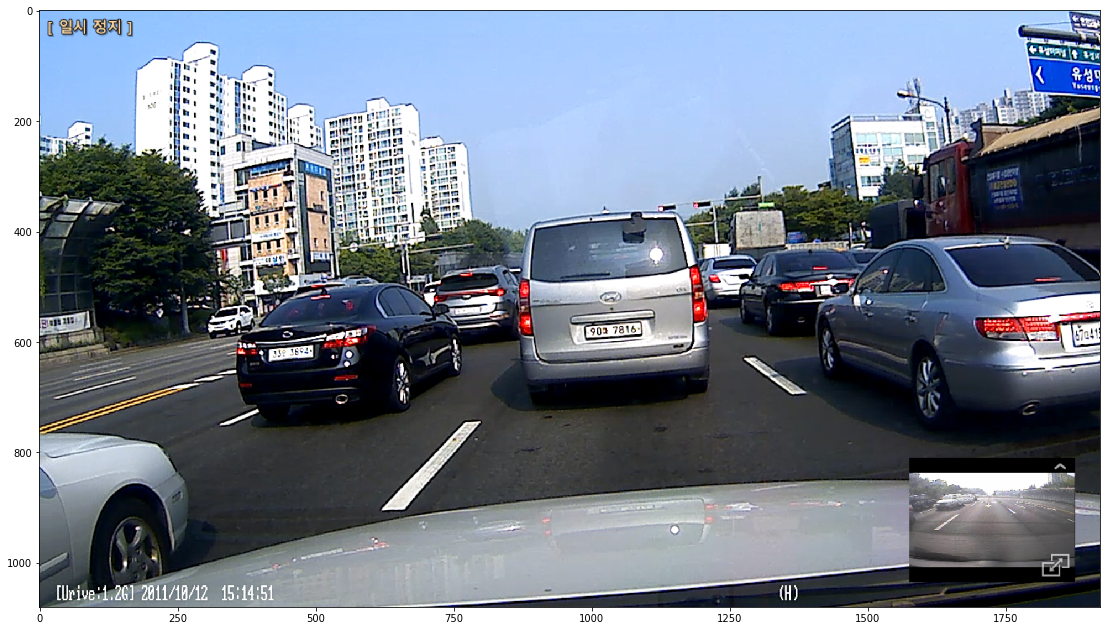

0.78930205 (403, 599) (499, 641)


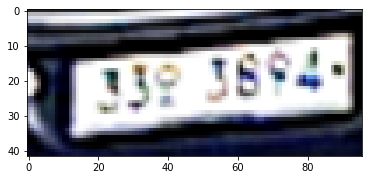

0.66920704 (955, 551) (1117, 605)


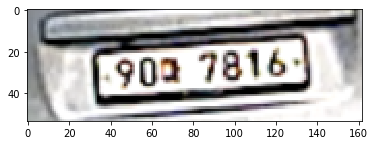

0.52809197 (1844, 550) (1919, 620)


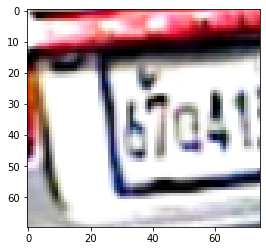

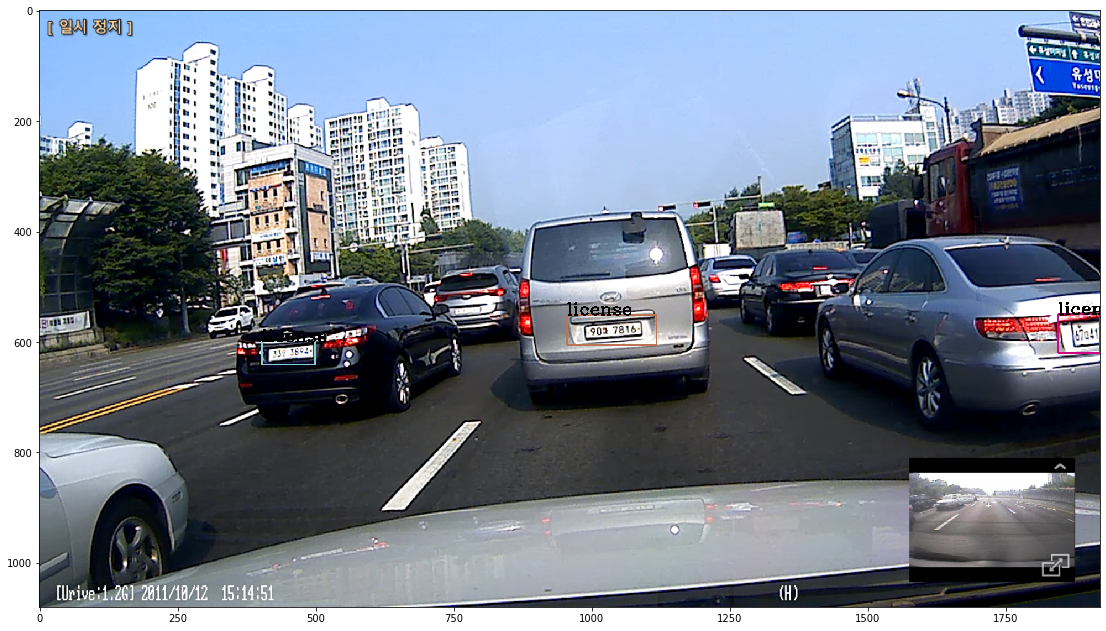

In [8]:
#Object_Detection_Predict

img = cv2.imread('C:/project/image_1.jpg', cv2.IMREAD_COLOR)
img1= img

#BGR 사진을 RGB 사진으로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#json형태로 결과 출력
results1 = tfnet1.return_predict(img)
#print((results))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#plot으로 원본 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(img1)
plt.show()

#이미지 3차원 행렬(y축, x축, 바로 색을 표현하는 BGR)
img.shape

index = 0

#랜덤한 색으로 추출된 바운딩 박스와 라벨 표시
resultimg = copy.deepcopy(img)
colors = [tuple(255*np.random.rand(3)) for _ in range(1000)]
for color, result1 in zip(colors, results1):
    t1 = (result1['topleft']['x'], result1['topleft']['y'])
    br = (result1['bottomright']['x'], result1['bottomright']['y'])
    label = result1['label']

    print(result1['confidence'],t1,br)
    crop_img = img[t1[1]:br[1], t1[0]:br[0]]
    plt.imshow(crop_img)
    plt.show()

    resultimg = cv2.rectangle(resultimg, t1, br, color, 2)
    resultimg = cv2.putText(resultimg, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)

    index += 1
    
#plot으로 결과가 표시된 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(resultimg)
plt.show()

{'label': 'license', 'confidence': 0.7607924, 'topleft': {'x': 291, 'y': 240}, 'bottomright': {'x': 353, 'y': 260}}
(291, 240) (353, 260)


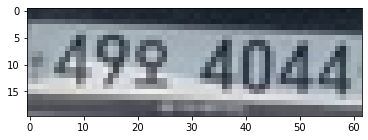

True

In [58]:
index1 = 2
print((results1[index1]))
t1 = (results1[index1]['topleft']['x'], results1[index1]['topleft']['y'])
br = (results1[index1]['bottomright']['x'], results1[index1]['bottomright']['y'])
print(t1,br)
crop_img = img[t1[1]:br[1], t1[0]:br[0]]
plt.imshow(crop_img)
plt.show()

crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
cv2.imwrite("c:/project/data/result/Object_Detection/"+"result"+str(index1)+".jpg",crop_img)

12


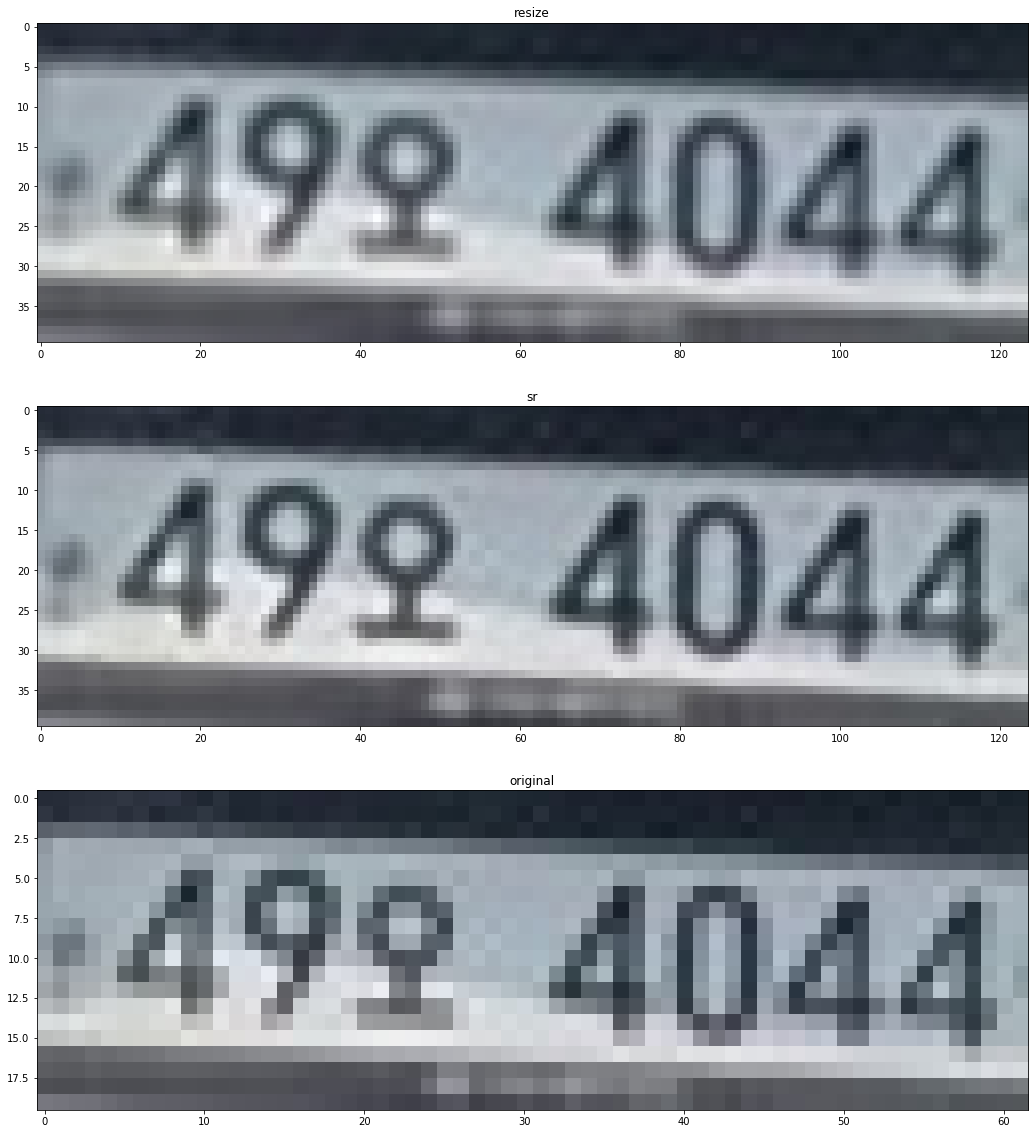

None


In [59]:
#Super_Resolution_Predict

index2 = index1

def psnr_calc():
    testimg = []
   
    GT = cv2.imread("c:/project/data/result/Object_Detection/"+"result"+str(index1)+".jpg")
    GT = np.asarray(GT)
    h = GT.shape[0]
    l = GT.shape[1]

    img1 = cv2.resize(GT,(int(l),int(h)),interpolation = cv2.INTER_CUBIC)
    img1 = np.asarray(GT)
    testimg.append(img1)
    testimg = np.asarray(testimg)

    fin =(model.predict(testimg)[0])
    inp = cv2.resize(img1,(l*2,h*2),interpolation = cv2.INTER_CUBIC)
    GT = GT[0:fin.shape[0],0:fin.shape[1],:]

    global num
    print(num)
    cv2.imwrite("c:/project/data/result/Super_Resolution/SR_result"+str(num)+".jpg", fin)
    fin = cv2.imread("c:/project/data/result/Super_Resolution/SR_result"+str(num)+".jpg")

    fig = plt.figure(figsize=(40,20))
    rows = 3
    cols = 1
    
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(inp, cv2.COLOR_BGR2RGB))
    ax1.set_title('resize')
    #ax1.axis("off")
    
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(fin, cv2.COLOR_BGR2RGB))
    ax2.set_title('sr')
    #ax2.axis("off")
    
    ax3 = fig.add_subplot(rows, cols, 3)
    ax3.imshow(cv2.cvtColor(GT, cv2.COLOR_BGR2RGB))
    ax3.set_title('original')
    #ax3.axis("off")
    
    plt.show()
    num += 1
ps1 = psnr_calc()
print(ps1)

12
0 0.32734463 (75, 7) (91, 34)


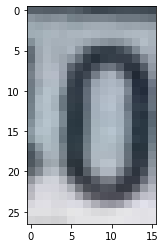

4 0.78132147 (8, 5) (24, 30)


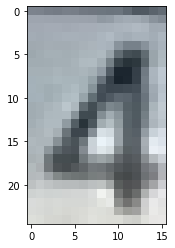

4 0.7648511 (61, 7) (77, 32)


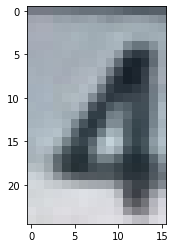

4 0.8211858 (91, 7) (106, 35)


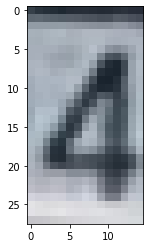

4 0.8397562 (105, 8) (121, 35)


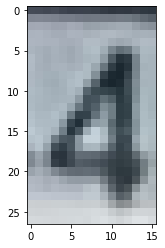

9 0.55506015 (22, 6) (39, 32)


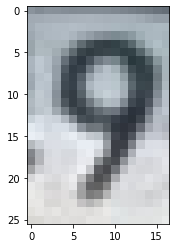

9 0.20149302 (37, 6) (53, 33)


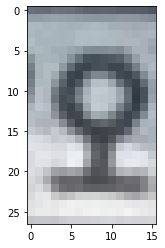

o 0.57286763 (38, 6) (54, 33)


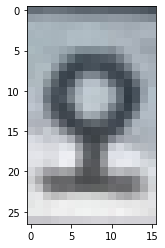

{'label': '4', 'confidence': 0.78132147, 'topleft': {'x': 8, 'y': 5}, 'bottomright': {'x': 24, 'y': 30}}
{'label': '9', 'confidence': 0.55506015, 'topleft': {'x': 22, 'y': 6}, 'bottomright': {'x': 39, 'y': 32}}
{'label': '9', 'confidence': 0.20149302, 'topleft': {'x': 37, 'y': 6}, 'bottomright': {'x': 53, 'y': 33}}
{'label': 'o', 'confidence': 0.57286763, 'topleft': {'x': 38, 'y': 6}, 'bottomright': {'x': 54, 'y': 33}}
{'label': '4', 'confidence': 0.7648511, 'topleft': {'x': 61, 'y': 7}, 'bottomright': {'x': 77, 'y': 32}}
{'label': '0', 'confidence': 0.32734463, 'topleft': {'x': 75, 'y': 7}, 'bottomright': {'x': 91, 'y': 34}}
{'label': '4', 'confidence': 0.8211858, 'topleft': {'x': 91, 'y': 7}, 'bottomright': {'x': 106, 'y': 35}}
{'label': '4', 'confidence': 0.8397562, 'topleft': {'x': 105, 'y': 8}, 'bottomright': {'x': 121, 'y': 35}}
113
{'label': '4', 'confidence': 0.78132147, 'topleft': {'x': 8, 'y': 5}, 'bottomright': {'x': 24, 'y': 30}}
{'label': '9', 'confidence': 0.55506015, 'to

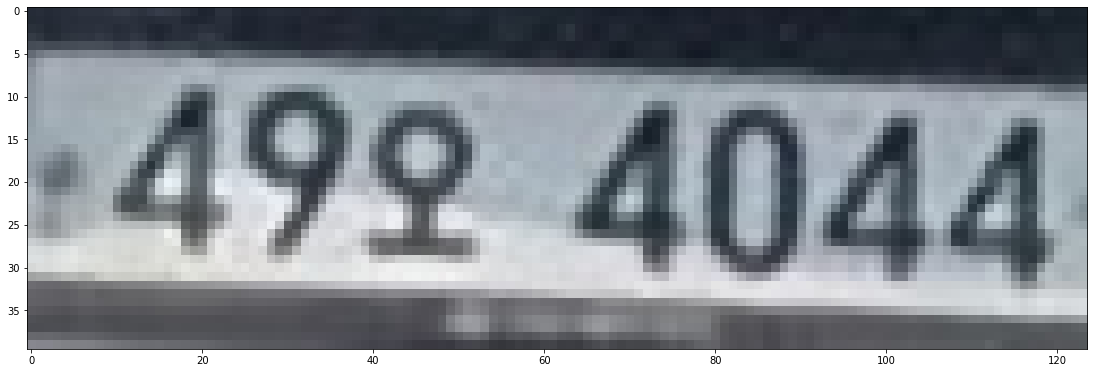

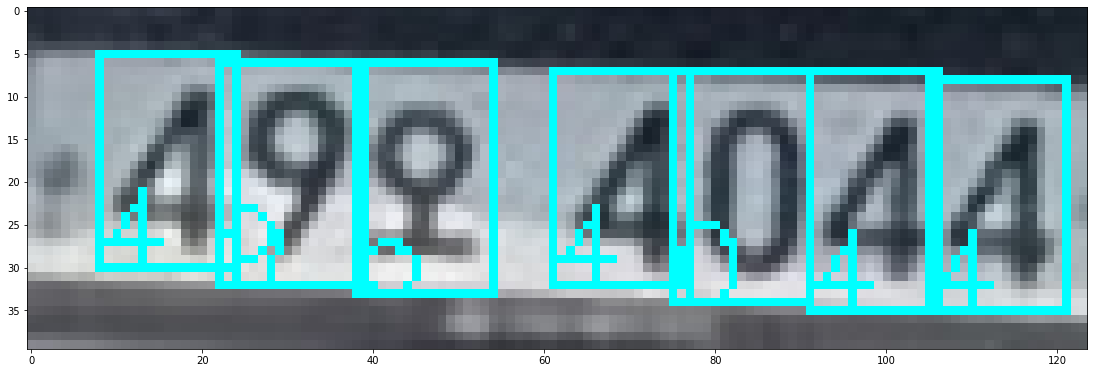

['4', '9', 'o', '4', '0', '4', '4']


In [60]:
#Recognition_Predict
print(num-1)
#이미지 파일을 color로 읽음
img = cv2.imread("c:/project/data/result/Super_Resolution/SR_result"+str(num-1)+".jpg", cv2.IMREAD_COLOR)
img1= img

#BGR 사진을 RGB 사진으로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#json형태로 결과 출력
results = tfnet2.return_predict(img)
#print((results))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#plot으로 원본 이미지 출력

#이미지 3차원 행렬(y축, x축, 바로 색을 표현하는 BGR)
imgsh=img.shape

#랜덤한 색으로 추출된 바운딩 박스와 라벨 표시
resultimg = copy.deepcopy(img)

resultarray = []
colors = [tuple(255*np.random.rand(3)) for _ in range(1000)]
for color, result in zip(colors, results):
    t1 = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    
    resultarray.append(result)
    
    print(label,confidence,t1,br)
    crop_img = img[t1[1]:br[1], t1[0]:br[0]]
    plt.imshow(crop_img)
    plt.show()

    #resultimg = cv2.rectangle(resultimg, t1, br, color, 1)
    #resultimg = cv2.putText(resultimg, label, (t1[0],br[1]), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255), 1)

list_length = len(resultarray)
    
for i in range(list_length-1):
    for j in range(list_length - i -1):
        if resultarray[j]['topleft']['x'] >= resultarray[j+1]['topleft']['x'] :
            resultarray[j],resultarray[j+1] = resultarray[j+1],resultarray[j]
    
for i in range(len(resultarray)):
    print(resultarray[i])

wide = resultarray[0]['topleft']['x'],resultarray[len(resultarray)-1]['bottomright']['x']
print(wide[1]-wide[0])
    
X = []

for i in range(list_length):
    for j in range(list_length):
        if abs(resultarray[i]['topleft']['x']-resultarray[j]['topleft']['x']) <= (wide[1]-wide[0])/15:
            if(resultarray[i]['confidence'] > resultarray[j]['confidence']):
                resultarray[j] = resultarray[i]
            else :
                resultarray[i] = resultarray[j]
    
for v in resultarray:
    if v not in X:
        X.append(v)
    
for i in range(len(X)):
    print(X[i])

for result in resultarray:
    t1 = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    
    resultimg = cv2.rectangle(resultimg, t1, br, (0, 255, 255), 1)
    resultimg = cv2.putText(resultimg, label, (t1[0],br[1]), cv2.FONT_HERSHEY_SIMPLEX, 1*(imgsh[1]/300), (0, 255, 255), 1)
    
#plot으로 원본 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(img1)
plt.show()
#plot으로 결과가 표시된 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(resultimg)
plt.show()

text = []
for i in X:
    text.append(i['label'])
    
print(text)